Extraer cuadros del video
Usaremos OpenCV para leer el video cuadro por cuadro.


In [2]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.8 MB 2.0 MB/s eta 0:00:20
   ---------------------------------------- 0.1/38.8 MB 1.5 MB/s eta 0:00:27
   ---------------------------------------- 0.2/38.8 MB 1.8 MB/s eta 0:00:22
   ---------------------------------------- 0.3/38.8 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.6/38.8 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.8/38.8 MB 3.1 MB/s eta 0:00:13
   - -------------------------------------- 1.2/38.8 MB 3.5 MB/s eta 0:00:11
   - -------------------------------------- 1.4/38.8 MB 3.8 MB/s eta 0:00:10
   - -------------------------------------- 1.4/38.8 MB 3.4 MB/s eta 0:00:12
   - -------------------------------------- 1.7/38.8 MB 3.7 MB/s eta 0:00:11
   - -------------------------------------- 1.8/38.8 MB 3.6 MB/s eta 0:00:11
   -- ------------------------------------- 1.9/38.8 MB 3.4 MB/s eta 0:00:11
   -- 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import cv2
import numpy as np
import csv

def load_reference_images(turned_on_path, turned_off_path):
    img_on = cv2.imread(turned_on_path)
    img_off = cv2.imread(turned_off_path)
    img_on = cv2.cvtColor(img_on, cv2.COLOR_BGR2GRAY)
    img_off = cv2.cvtColor(img_off, cv2.COLOR_BGR2GRAY)
    return img_on, img_off

def compare_frames(frame, img_on, img_off, threshold=0.7):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    h, w = img_on.shape
    gray_frame_resized = cv2.resize(gray_frame, (w, h))

    score_on = cv2.matchTemplate(gray_frame_resized, img_on, cv2.TM_CCOEFF_NORMED)
    score_off = cv2.matchTemplate(gray_frame_resized, img_off, cv2.TM_CCOEFF_NORMED)

    # Debug: Imprimir las puntuaciones
    print(f"Score On: {score_on.max()}, Score Off: {score_off.max()}")

    if score_on.max() >= threshold:
        return "Encendida"
    elif score_off.max() >= threshold:
        return "Apagada"
    else:
        return "Desconocida"

def analyze_video(video_path, img_on, img_off, threshold):
    video = cv2.VideoCapture(video_path)
    
    # Verificar si el video se ha cargado correctamente
    if not video.isOpened():
        print("Error al abrir el video.")
        return []

    lamp_status = []

    while True:
        success, frame = video.read()
        if not success:
            print("sali break")
            break

        status = compare_frames(frame, img_on, img_off, threshold)
        lamp_status.append(status)
        print(status)  # Imprimir el estado de la lámpara

        # Visualización opcional para depuración
        cv2.imshow("Frame", frame)
        key = cv2.waitKey(1)
        if key == 27:  # Salir si se presiona 'Esc'
            break

    video.release()
    cv2.destroyAllWindows()
    print(f"Número de estados registrados: {len(lamp_status)}")
    return lamp_status


# Rutas a las imágenes de referencia
turned_on_image_path = "D:\pyhton AI\lamp_on.jpg"
turned_off_image_path = "D:\pyhton AI\lamp_off.jpg"

# Cargar las imágenes de referencia
img_on, img_off = load_reference_images(turned_on_image_path, turned_off_image_path)

# Definir el umbral (puedes ajustar este valor según sea necesario)
threshold = 0.7  # Ajusta este valor según las pruebas

# Analiza el video
video_path = "D:\python AI\Lampara.mp4"
lamp_status = analyze_video(video_path, img_on, img_off, threshold)


Error al abrir el video.


<>:63: SyntaxWarning: invalid escape sequence '\p'
<>:64: SyntaxWarning: invalid escape sequence '\p'
<>:73: SyntaxWarning: invalid escape sequence '\p'
<>:63: SyntaxWarning: invalid escape sequence '\p'
<>:64: SyntaxWarning: invalid escape sequence '\p'
<>:73: SyntaxWarning: invalid escape sequence '\p'
C:\Users\FATIMA\AppData\Local\Temp\ipykernel_11300\855212360.py:63: SyntaxWarning: invalid escape sequence '\p'
  turned_on_image_path = "D:\pyhton AI\lamp_on.jpg"
C:\Users\FATIMA\AppData\Local\Temp\ipykernel_11300\855212360.py:64: SyntaxWarning: invalid escape sequence '\p'
  turned_off_image_path = "D:\pyhton AI\lamp_off.jpg"
C:\Users\FATIMA\AppData\Local\Temp\ipykernel_11300\855212360.py:73: SyntaxWarning: invalid escape sequence '\p'
  video_path = "D:\python AI\Lampara.mp4"


In [ ]:
import cv2

def capture_frames_from_video(video_path, output_on_path, output_off_path):
    video = cv2.VideoCapture(video_path)
    
    if not video.isOpened():
        print("Error al abrir el video.")
        return

    captured_on = False
    captured_off = False

    while True:
        success, frame = video.read()
        if not success:
            print("Fin del video.")
            break

        # Obtener las dimensiones del fotograma
        height, width, _ = frame.shape

        # Definir el tamaño del área de interés (puedes ajustarlo según tus necesidades)
        crop_height = height // 2  # Altura del área central
        crop_width = width // 2    # Ancho del área central

        # Calcular las coordenadas para recortar el área central
        start_x = (width - crop_width) // 2
        start_y = (height - crop_height) // 2

        # Recortar el área central
        cropped_frame = frame[start_y:start_y + crop_height, start_x:start_x + crop_width]

        # Mostrar el fotograma recortado
        cv2.imshow("Video - Presiona 'o' para Encendida, 'a' para Apagada, 'p' para Pausar, 'q' para Salir", cropped_frame)

        key = cv2.waitKey(100)  # Esperar 100 ms para la próxima imagen

        # Presiona 'o' para capturar la lámpara encendida
        if key & 0xFF == ord('o') and not captured_on:
            cv2.imwrite(output_on_path, cropped_frame)
            print("Fotograma de lámpara encendida guardado.")
            captured_on = True  # Marcar que ya se ha capturado el fotograma encendido

        # Presiona 'a' para capturar la lámpara apagada
        elif key & 0xFF == ord('a') and not captured_off:
            cv2.imwrite(output_off_path, cropped_frame)
            print("Fotograma de lámpara apagada guardado.")
            captured_off = True  # Marcar que ya se ha capturado el fotograma apagado

        # Presiona 'p' para pausar el video
        elif key & 0xFF == ord('p'):
            print("Video pausado. Presiona 'p' nuevamente para continuar.")
            while True:
                key_paused = cv2.waitKey(0)
                if key_paused & 0xFF == ord('p'):
                    print("Continuando...")
                    break
                elif key_paused & 0xFF == ord('q'):
                    video.release()
                    cv2.destroyAllWindows()
                    return

        # Presiona 'q' para salir del bucle
        elif key & 0xFF == ord('q'):
            break

    video.release()
    cv2.destroyAllWindows()

# Rutas del video y de salida
video_path = "D:\pyhton AI\Lampara.mp4"
output_on_path = "D:\pyhton AI\lamp_on1.jpg"
output_off_path = "D:\pyhton AI\lamp_off2.jpg"


# Captura de fotogramas manualmente
capture_frames_from_video(video_path, output_on_path, output_off_path)


In [8]:
import cv2
import numpy as np
import csv

def load_reference_images(turned_on_path, turned_off_path):
    img_on = cv2.imread(turned_on_path)
    img_off = cv2.imread(turned_off_path)
    img_on = cv2.cvtColor(img_on, cv2.COLOR_BGR2GRAY)
    img_off = cv2.cvtColor(img_off, cv2.COLOR_BGR2GRAY)
    return img_on, img_off

def compare_frames(frame, img_on, img_off, threshold=0.7):
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    h, w = img_on.shape
    gray_frame_resized = cv2.resize(gray_frame, (w, h))

    score_on = cv2.matchTemplate(gray_frame_resized, img_on, cv2.TM_CCOEFF_NORMED)
    score_off = cv2.matchTemplate(gray_frame_resized, img_off, cv2.TM_CCOEFF_NORMED)

    # Debug: Imprimir las puntuaciones
    print(f"Score On: {score_on.max()}, Score Off: {score_off.max()}")

    if score_on.max() >= threshold:
        return "Encendida"
    elif score_off.max() >= threshold:
        return "Apagada"
    else:
        return "Desconocida"

def analyze_video(video_path, img_on, img_off, threshold=0.7):
    video = cv2.VideoCapture(video_path)
    lamp_status = []

    if not video.isOpened():
        print("Error al abrir el video.")
        return []

    while True:
        success, frame = video.read()
        if not success:
            print("Fin del video.")
            break

        # Área de interés central de la lámpara
        height, width, _ = frame.shape
        crop_height, crop_width = height // 2, width // 2
        start_x, start_y = (width - crop_width) // 2, (height - crop_height) // 2
        cropped_frame = frame[start_y:start_y + crop_height, start_x:start_x + crop_width]

        # Estado de la lámpara basado en comparación de fotogramas
        status = compare_frames(cropped_frame, img_on, img_off, threshold)
        lamp_status.append(status)
        print(status)

        # Visualización
        cv2.imshow("Frame", cropped_frame)
        key = cv2.waitKey(1)

        if key == 27:  # Salir si se presiona 'Esc'
            break

    video.release()
    cv2.destroyAllWindows()
    
    # Guardar resultados en CSV
    with open('lamp_status.csv', mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Frame", "Estado"])
        for i, status in enumerate(lamp_status):
            writer.writerow([i, status])

    print(f"Número de estados registrados: {len(lamp_status)}")
    return lamp_status

# Rutas de archivos
turned_on_image_path = "D:\\pyhton AI\\lamp_on.jpg"
turned_off_image_path = "D:\\pyhton AI\\lamp_off.jpg"
video_path = "D:\\pyhton AI\\Lampara.mp4"

# Cargar imágenes y analizar video
img_on, img_off = load_reference_images(turned_on_image_path, turned_off_image_path)
lamp_status = analyze_video(video_path, img_on, img_off, threshold=0.7)


Score On: 0.9322643876075745, Score Off: 0.3638147711753845
Encendida
Score On: 0.9335653185844421, Score Off: 0.36570873856544495
Encendida
Score On: 0.9339420199394226, Score Off: 0.3682374358177185
Encendida
Score On: 0.9332944750785828, Score Off: 0.3741677403450012
Encendida
Score On: 0.9318758845329285, Score Off: 0.3800816833972931
Encendida
Score On: 0.9303547739982605, Score Off: 0.38399654626846313
Encendida
Score On: 0.928035318851471, Score Off: 0.3896588087081909
Encendida
Score On: 0.9261029362678528, Score Off: 0.3943638205528259
Encendida
Score On: 0.9223782420158386, Score Off: 0.40075069665908813
Encendida
Score On: 0.9202786087989807, Score Off: 0.4053185284137726
Encendida
Score On: 0.9185479283332825, Score Off: 0.4092291295528412
Encendida
Score On: 0.7994911074638367, Score Off: 0.3835074305534363
Encendida
Score On: 0.3815595805644989, Score Off: 0.8040035367012024
Apagada
Score On: 0.3739333748817444, Score Off: 0.8083926439285278
Apagada
Score On: 0.3626791834

   Frame     Estado
0      0  Encendida
1      1  Encendida
2      2  Encendida
3      3  Encendida
4      4  Encendida
Patrón de parpadeo detectado:
         Estado  Duracion_frames
0     Encendida               12
1       Apagada                4
2     Encendida                8
3       Apagada                8
4     Encendida               18
5       Apagada               10
6     Encendida               19
7       Apagada                7
8     Encendida               11
9       Apagada               13
10    Encendida               22
11      Apagada                5
12    Encendida               21
13      Apagada                9
14  Desconocida                1
15    Encendida                2
16      Apagada                8
17    Encendida                9
18      Apagada                2
19  Desconocida                6
20    Encendida                3
21  Desconocida                3
22    Encendida                6
23  Desconocida                2
24    Encendida          

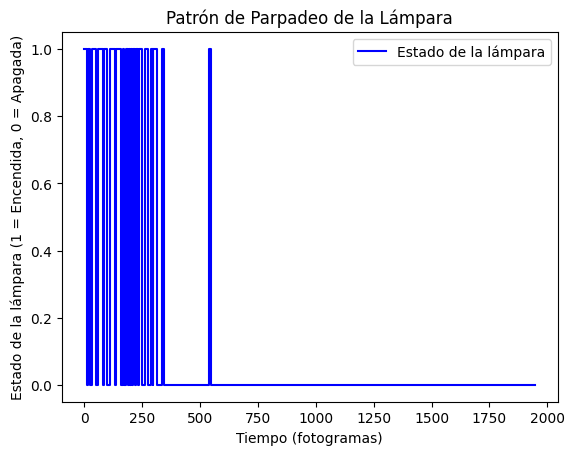

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos del archivo CSV
data = pd.read_csv('lamp_status.csv')

# Verificar los datos cargados
print(data.head())

# Variables para analizar los patrones
pattern = []
current_state = None
duration = 0

# Recorrer cada fila para encontrar la duración de cada estado
for index, row in data.iterrows():
    frame = row['Frame']
    state = row['Estado']
    
    # Si el estado cambia, almacenamos el estado anterior y su duración
    if state != current_state:
        if current_state is not None:
            pattern.append({'Estado': current_state, 'Duracion_frames': duration})
        # Actualizar al nuevo estado y reiniciar duración
        current_state = state
        duration = 1
    else:
        # Incrementar duración si el estado es el mismo
        duration += 1

# Añadir el último estado después del bucle
if current_state is not None:
    pattern.append({'Estado': current_state, 'Duracion_frames': duration})

# Convertir a DataFrame para facilitar el análisis
pattern_df = pd.DataFrame(pattern)

# Mostrar el patrón de parpadeo
print("Patrón de parpadeo detectado:")
print(pattern_df)

# Calcular frecuencia promedio de parpadeo
encendido_durations = pattern_df[pattern_df['Estado'] == 'Encendida']['Duracion_frames']
apagado_durations = pattern_df[pattern_df['Estado'] == 'Apagada']['Duracion_frames']

average_on_duration = encendido_durations.mean()
average_off_duration = apagado_durations.mean()
frequency = 1 / ((average_on_duration + average_off_duration) / 30)  # Frecuencia en Hz si son 30 fps

print(f"\nDuración promedio de Encendido: {average_on_duration} frames")
print(f"Duración promedio de Apagado: {average_off_duration} frames")
print(f"Frecuencia aproximada de parpadeo: {frequency:.2f} Hz")

# Graficar el patrón de parpadeo
fig, ax = plt.subplots()
times = []
states = []
time_counter = 0

for _, row in pattern_df.iterrows():
    estado = row['Estado']
    duracion = row['Duracion_frames']
    times.extend([time_counter, time_counter + duracion])
    states.extend([1 if estado == 'Encendida' else 0, 1 if estado == 'Encendida' else 0])
    time_counter += duracion

ax.plot(times, states, drawstyle='steps-post', color='blue', label="Estado de la lámpara")
ax.set_xlabel("Tiempo (fotogramas)")
ax.set_ylabel("Estado de la lámpara (1 = Encendida, 0 = Apagada)")
ax.set_title("Patrón de Parpadeo de la Lámpara")
ax.legend()
plt.show()